<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/homework_3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1
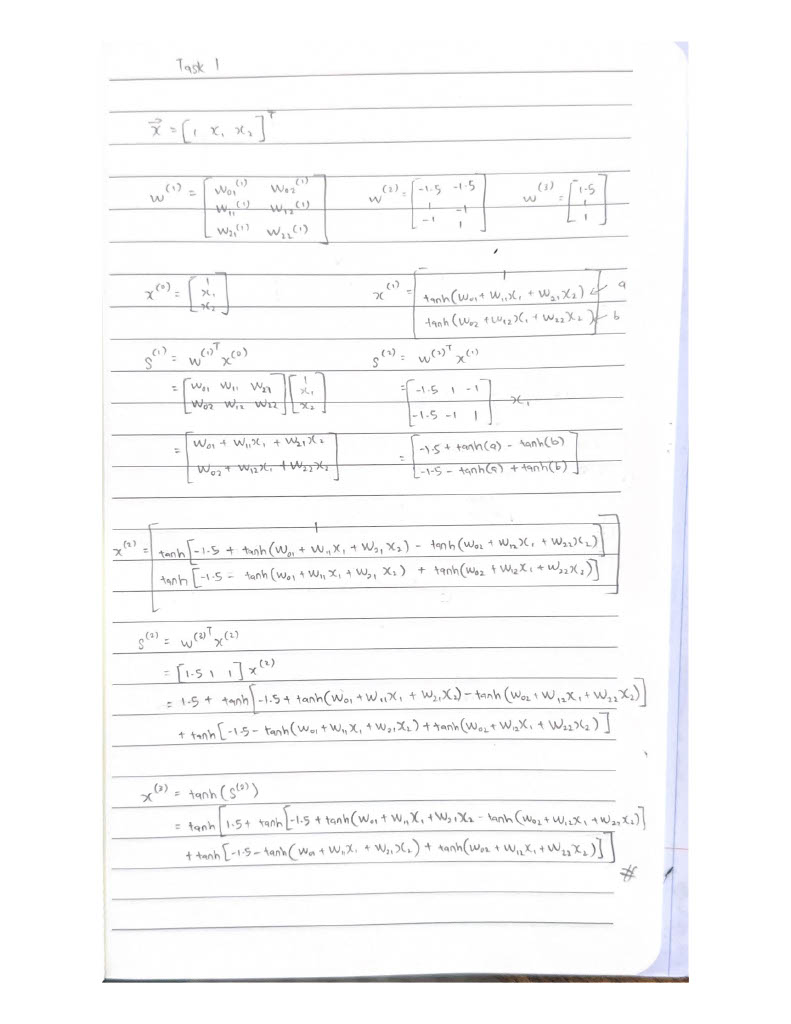

In [1]:
from sympy import symbols, Matrix, tanh

def tanh_elementwise(mat):
    return Matrix([tanh(element) for element in mat])

x1, x2 = symbols('x1 x2')

x0 = Matrix([1, x1, x2])

w01, w11, w21, w02, w12, w22 = symbols('w01 w11 w21 w02 w12 w22')
w1 = Matrix([[w01, w11, w21], [w02, w12, w22]])

w2 = Matrix([[-1.5, 1, -1], [-1.5, -1, 1]])
w3 = Matrix([[1.5, 1, 1]])

s1 = w1 * x0
x1 = tanh_elementwise(s1)
x1_biased = Matrix.vstack(Matrix([1]), x1)

s2 = w2 * x1_biased
x2 = tanh_elementwise(s2)
x2_biased = Matrix.vstack(Matrix([1]), x2)

s3 = w3 * x2_biased
f = tanh(s3[0])

print("f = ")
f

f = 


-tanh(tanh(-tanh(w01 + w11*x1 + w21*x2) + tanh(w02 + w12*x1 + w22*x2) + 1.5) + tanh(tanh(w01 + w11*x1 + w21*x2) - tanh(w02 + w12*x1 + w22*x2) + 1.5) - 1.5)

# Task 2 [HP 1]

## Part 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def initialize_weights(layer_structure):
    np.random.seed(0)
    weights = []
    for i in range(1, len(layer_structure)):
        input_dim = layer_structure[i - 1] + 1
        output_dim = layer_structure[i]
        weight_matrix = np.random.randn(output_dim, input_dim) * 0.01
        weights.append(weight_matrix)
    return weights

def forward_propagation(x0, weights):
    activations = {'x0': x0}
    signals = {}
    a = x0

    for i, w in enumerate(weights, start=1):
        s = np.dot(w, a)
        signals[f's{i}'] = s

        x = tanh(s)
        if i < len(weights):
            x = np.insert(x, 0, 1)

        activations[f'x{i}'] = x
        a = x

    return activations, signals

def backward_propagation(y, activations, signals, weights):
    deltas = {}
    gradients = {}

    last_signal = f's{len(weights)}'
    last_activation = f'x{len(weights)}'
    deltas[last_signal] = -2 * (y - activations[last_activation]) * tanh_derivative(signals[last_signal])

    prev_activation = f'x{len(weights) - 1}'
    gradients[f'w{len(weights)}'] = np.outer(deltas[last_signal], activations[prev_activation])

    for l in range(len(weights) - 1, 0, -1):
        current_signal = f's{l}'
        prev_activation = f'x{l-1}' if l > 1 else 'x0'
        current_weight = f'w{l}'
        next_weight = f'w{l+1}'

        deltas[current_signal] = np.dot(weights[l][:, 1:].T, deltas[f's{l+1}']) * tanh_derivative(signals[current_signal])

        gradients[current_weight] = np.outer(deltas[current_signal], activations[prev_activation])

    loss = np.sum((y - activations[last_activation]) ** 2)

    return gradients, {'loss': loss}

# Input layer, two hidden layers, and output layer
layer_structure = [2, 2, 2, 1]

weights = initialize_weights(layer_structure)

# test with random w1 with w2 and w3 from the graph from task 1
# w1 = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])
# w2 = np.array([[-1.5, 1, -1], [-1.5, -1, 1]])
# w3 = np.array([[1.5, 1, 1]])
# weights = [w1, w2 ,w3]

x0 = np.array([1, 0.5, -0.5])
activations, signals = forward_propagation(x0, weights)

y = 1
gradients, loss = backward_propagation(y, activations, signals, weights)

In [4]:
activations, signals

({'x0': array([ 1. ,  0.5, -0.5]),
  'x1': array([1.        , 0.01474655, 0.03661673]),
  'x2': array([1.        , 0.00944049, 0.0046597 ]),
  'x3': array([0.0076424])},
 {'s1': array([0.01474762, 0.03663311]),
  's2': array([0.00944077, 0.00465973]),
  's3': array([0.00764255])})

In [5]:
gradients, loss

({'w3': array([[-1.98459928, -0.01873559, -0.00924764]]),
  'w2': array([[-2.41454630e-03, -3.56062289e-05, -8.84127973e-05],
         [-8.80871528e-03, -1.29898165e-04, -3.22546376e-04]]),
  'w1': array([[-9.03183369e-06, -4.51591685e-06,  4.51591685e-06],
         [-1.25442129e-04, -6.27210644e-05,  6.27210644e-05]])},
 {'loss': 0.984773610505087})

## Part 2


In [6]:
def stochastic_gradient_descent(x, y, weights, learning_rate, epochs):
    n_samples = x.shape[0]
    avg_losses = []

    for epoch in range(epochs):
        total_loss = 0
        idx = np.random.randint(n_samples)
        x0 = np.insert(x[idx], 0, 1)
        activations, signals = forward_propagation(x0, weights)
        gradients, loss = backward_propagation(y[idx], activations, signals, weights)
        total_loss += loss['loss']

        for layer in range(len(weights)):
            weights[layer] -= learning_rate * gradients[f'w{layer+1}']

        avg_loss = total_loss / n_samples
        avg_losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}")

    return weights, avg_losses

In [7]:
x0 = np.array([[0.1, 0.2], [0.2, 0.2], [0.3, 0.4]])
y = np.array([0.5, 0.6, 0.7])

layer_structure = [2, 2, 2, 1]
weights = initialize_weights(layer_structure)

trained_weights, avg_losses = stochastic_gradient_descent(x0, y, weights, learning_rate=0.01, epochs=100)

Epoch 1/100, Average Loss: 0.15978669863106654
Epoch 2/100, Average Loss: 0.07632504746652796
Epoch 3/100, Average Loss: 0.10790246946570198
Epoch 4/100, Average Loss: 0.1036387883418235
Epoch 5/100, Average Loss: 0.13931688370477427
Epoch 6/100, Average Loss: 0.06268210880605994
Epoch 7/100, Average Loss: 0.09189258881271835
Epoch 8/100, Average Loss: 0.08829641902273044
Epoch 9/100, Average Loss: 0.08485271029855952
Epoch 10/100, Average Loss: 0.05191314270898246
Epoch 11/100, Average Loss: 0.11482702168432733
Epoch 12/100, Average Loss: 0.04699977878598583
Epoch 13/100, Average Loss: 0.10762671355945565
Epoch 14/100, Average Loss: 0.10351554163157735
Epoch 15/100, Average Loss: 0.040040809468314724
Epoch 16/100, Average Loss: 0.0971940009305754
Epoch 17/100, Average Loss: 0.0362440966064535
Epoch 18/100, Average Loss: 0.0348913169684049
Epoch 19/100, Average Loss: 0.03359476316827119
Epoch 20/100, Average Loss: 0.05645444947966614
Epoch 21/100, Average Loss: 0.05437616282848845
Epoc

## Part 3

In [8]:
train_data = pd.read_csv('ZipDigits.train', header=None, sep=' ')
test_data = pd.read_csv('ZipDigits.test', header=None, sep=' ')

n1 = 1
n2 = 5
train_data_filtered = train_data[(train_data[0] == n1) | (train_data[0] == n2)]
test_data_filtered = test_data[(test_data[0] == n1) | (test_data[0] == n2)]

train_data_filtered = train_data_filtered.dropna(axis=1)
test_data_filtered = test_data_filtered.dropna(axis=1)

train_data_filtered[0] = train_data_filtered[0].apply(lambda x: 1 if x == n1 else -1)
test_data_filtered[0] = test_data_filtered[0].apply(lambda x: 1 if x == n1 else -1)

In [9]:
intensity_list_train = []
symmetry_list_train = []
labels_train = []

for index, row in train_data_filtered.iterrows():
    label = row[0]
    pixels = row[1:].values

    # Find the intensity
    intensity = np.mean(pixels)

    # Find the symmetry
    left_half = pixels[:128]
    right_half = np.flip(pixels[128:])
    symmetry = -np.mean(np.abs(left_half - right_half))

    intensity_list_train.append(intensity)
    symmetry_list_train.append(symmetry)
    labels_train.append(label)

def extract_features(intensity_list, symmetry_list, data):
    x = np.column_stack((intensity_list, symmetry_list))
    y = data[0].values
    return x, y

In [10]:
x_train, y_train = extract_features(intensity_list_train, symmetry_list_train, train_data_filtered)

In [95]:
def stochastic_gradient_descent_(x, y, weights, learning_rate, epochs):
    n_samples = x.shape[0]
    in_sample_errors = []

    for epoch in range(epochs):
        idx = np.random.randint(n_samples)
        x0 = np.insert(x[idx], 0, 1)

        activations, signals = forward_propagation(x0, weights)
        gradients, loss = backward_propagation(y[idx], activations, signals, weights)
        # total_loss += loss['loss']

        for layer in range(len(weights)):
            weights[layer] -= learning_rate * gradients[f'w{layer+1}']

        in_sample_errors.append(loss['loss'])
        if epoch % 100000 == 0:
          print(f"Epoch {epoch+1}/{epochs}, Loss: {loss['loss']}")

    return weights, in_sample_errors

In [32]:
layer_structure = [2, 1]
weights = initialize_weights(layer_structure)

total_iterations = 2 * 10**6
# Number of samples in the training dataset
num_samples = len(x_train)
num_epochs = total_iterations // num_samples

#trained_weights, in_sample_errors = stochastic_gradient_descent(x_train, y_train, weights, learning_rate=0.01, epochs=num_epochs)
trained_weights, in_sample_errors = stochastic_gradient_descent(x_train, y_train, weights, learning_rate=0.01, epochs=2 * 10**6)

Epoch 1/2000000, Loss: 0.9725349936530032
Epoch 100001/2000000, Loss: 0.008088511993614452
Epoch 200001/2000000, Loss: 1.908420790030572e-06
Epoch 300001/2000000, Loss: 9.847195323009677e-07
Epoch 400001/2000000, Loss: 0.000393772120956855
Epoch 500001/2000000, Loss: 2.3918785988776515e-06
Epoch 600001/2000000, Loss: 2.6395117037574775e-05
Epoch 700001/2000000, Loss: 4.563014443278768e-07
Epoch 800001/2000000, Loss: 9.482711469551005e-06
Epoch 900001/2000000, Loss: 1.1701496524747489e-05
Epoch 1000001/2000000, Loss: 7.160796371429095e-07
Epoch 1100001/2000000, Loss: 1.8430186046812769
Epoch 1200001/2000000, Loss: 5.669034170258098e-07
Epoch 1300001/2000000, Loss: 1.6061945718489502e-11
Epoch 1400001/2000000, Loss: 9.280521747898064e-07
Epoch 1500001/2000000, Loss: 3.553442226854253e-06
Epoch 1600001/2000000, Loss: 0.0004956321677147235
Epoch 1700001/2000000, Loss: 4.841671352733191e-06
Epoch 1800001/2000000, Loss: 2.3353726496526896e-06
Epoch 1900001/2000000, Loss: 9.458972970188197e-0

## Part 4

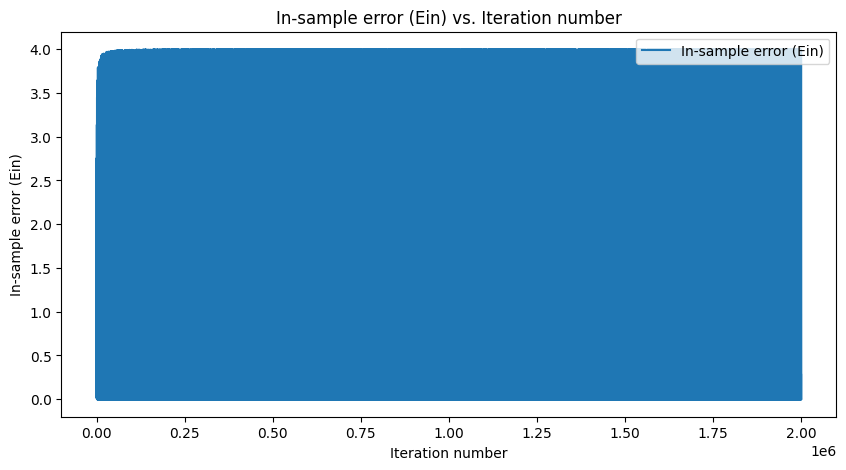

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(in_sample_errors, label='In-sample error (Ein)')
plt.xlabel('Iteration number')
plt.ylabel('In-sample error (Ein)')
plt.title('In-sample error (Ein) vs. Iteration number')
plt.legend(loc='upper right')
plt.show()

## Part 5


In [35]:
intensity_list_test = []
symmetry_list_test = []
labels_test = []

for index, row in test_data_filtered.iterrows():
    label = row[0]
    pixels = row[1:].values

    # Find the intensity
    intensity = np.mean(pixels)

    # Find the symmetry
    left_half = pixels[:128]
    right_half = np.flip(pixels[128:])
    symmetry = -np.mean(np.abs(left_half - right_half))

    intensity_list_test.append(intensity)
    symmetry_list_test.append(symmetry)
    labels_test.append(label)

x_test, y_test = extract_features(intensity_list_test, symmetry_list_test, test_data_filtered)

In [38]:
def predict(features, weights):
    predictions = []
    for feature in features:
        idx = np.random.randint(feature.shape[0])
        x0 = np.insert(features[idx], 0, 1)
        activations, _ = forward_propagation(x0, weights)
        output_activation = activations[f'x{len(weights)}']
        prediction = np.sign(output_activation)
        predictions.append(prediction)
    return np.array(predictions)

def compute_error(y_true, y_pred):
    return np.mean(y_true != y_pred)

# Compute Ein (training error)
train_predictions = predict(x_train, trained_weights)
Ein = compute_error(train_predictions, y_train)

# Compute Etest (test error)
test_predictions = predict(x_test, trained_weights)
Etest = compute_error(test_predictions, y_test)

print(f"Ein: {Ein}, Etest: {Etest}")

Ein: 0.5023033002136889, Etest: 0.4936365254538982


# Task 2 [HP 2]

In [49]:
def forward_propagation_batch(X, weights):
    activations = {'x0': X}
    signals = {}
    A = X

    for i, W in enumerate(weights, start=1):
        S = np.dot(A, W.T)
        signals[f's{i}'] = S

        X = tanh(S)
        if i < len(weights):
            X = np.insert(X, 0, 1, axis=1)

        activations[f'x{i}'] = X
        A = X

    return activations, signals

def backward_propagation_batch(Y, activations, signals, weights):
    deltas = {}
    gradients = {}
    N = Y.shape[0]

    last_signal = f's{len(weights)}'
    last_activation = f'x{len(weights)}'
    deltas[last_signal] = -2 * (Y - activations[last_activation]) * tanh_derivative(signals[last_signal])

    prev_activation = f'x{len(weights) - 1}'
    gradients[f'w{len(weights)}'] = np.dot(deltas[last_signal].T, activations[prev_activation]).mean(axis=0)

    for l in range(len(weights) - 1, 0, -1):
        current_signal = f's{l}'
        prev_activation = f'x{l-1}' if l > 1 else 'x0'
        current_weight = f'w{l}'

        deltas[current_signal] = np.dot(deltas[f's{l+1}'][:, 1:], weights[l][:, 1:]) * tanh_derivative(signals[current_signal])
        gradients[current_weight] = np.dot(deltas[current_signal].T, activations[prev_activation]).mean(axis=0)

    loss = np.mean((Y - activations[last_activation]) ** 2)

    return gradients, {'loss': loss}

In [87]:
def mini_batch_gradient_descent(x, y, weights, learning_rate, epochs, batch_size=32):
    n_samples = x.shape[0]
    in_sample_errors = []

    for epoch in range(epochs):
        # Shuffle the dataset at the beginning of each epoch
        shuffled_indices = np.random.permutation(n_samples)
        x_shuffled = x[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for start_idx in range(0, n_samples, batch_size):
            end_idx = min(start_idx + batch_size, n_samples)
            x_batch = np.insert(x_shuffled[start_idx:end_idx], 0, 1, axis=1)
            y_batch = y_shuffled[start_idx:end_idx]

            # Forward and backward propagation on the batch
            activations, signals = forward_propagation_batch(x_batch, weights)
            gradients, loss = backward_propagation_batch(y_batch, activations, signals, weights)

            # Update weights
            for layer in range(len(weights)):
                weights[layer] -= learning_rate * gradients[f'w{layer+1}']

            in_sample_errors.append(loss['loss'])

        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss['loss']}")

    return weights, in_sample_errors


In [88]:
layer_structure = [2, 1]
weights = initialize_weights(layer_structure)

total_iterations = 2 * 10**6
n_samples = len(x_train)
batch_size = 32
num_epochs = total_iterations // (n_samples // batch_size)

trained_weights, in_sample_errors = mini_batch_gradient_descent(x_train, y_train, weights, learning_rate=0.01, epochs=num_epochs, batch_size=32)

Streaming output truncated to the last 5000 lines.
Epoch 36667/41666, Loss: 0.8730337023052612
Epoch 36668/41666, Loss: 1.1050436520434916
Epoch 36669/41666, Loss: 0.9537357450123698
Epoch 36670/41666, Loss: 0.7155018238529497
Epoch 36671/41666, Loss: 0.9870862391804938
Epoch 36672/41666, Loss: 0.953629763129276
Epoch 36673/41666, Loss: 1.0420776414744768
Epoch 36674/41666, Loss: 0.8718140416773978
Epoch 36675/41666, Loss: 0.9221166285179281
Epoch 36676/41666, Loss: 0.7348668725495436
Epoch 36677/41666, Loss: 1.0035602241839736
Epoch 36678/41666, Loss: 0.929915499795609
Epoch 36679/41666, Loss: 1.071671486706002
Epoch 36680/41666, Loss: 0.9250102840077851
Epoch 36681/41666, Loss: 0.8482136418201786
Epoch 36682/41666, Loss: 0.8890376826423048
Epoch 36683/41666, Loss: 0.8716854767844215
Epoch 36684/41666, Loss: 1.0244482753501156
Epoch 36685/41666, Loss: 0.9447690078209152
Epoch 36686/41666, Loss: 0.9238602660888886
Epoch 36687/41666, Loss: 0.746932136677447
Epoch 36688/41666, Loss: 1.09

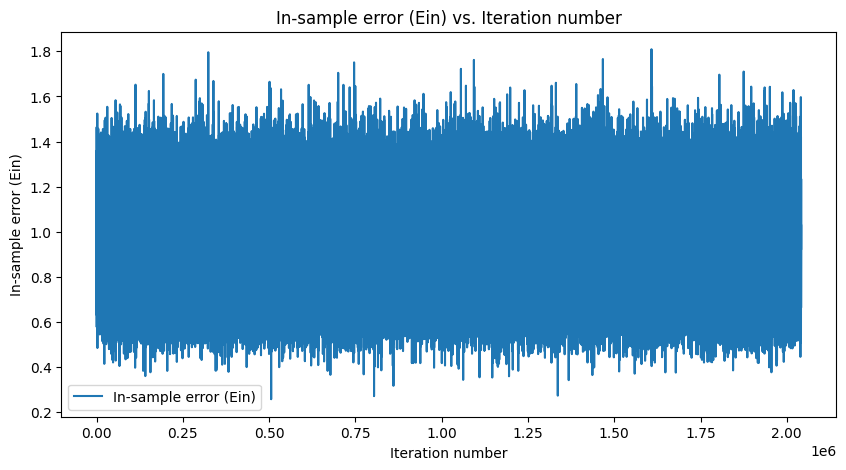

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(in_sample_errors, label='In-sample error (Ein)')
plt.xlabel('Iteration number')
plt.ylabel('In-sample error (Ein)')
plt.title('In-sample error (Ein) vs. Iteration number')
plt.legend()
plt.show()

In [93]:
# Compute Ein (training error)
train_predictions = predict(x_train, trained_weights)
Ein = compute_error(train_predictions, y_train)

# Compute Etest (test error)
test_predictions = predict(x_test, trained_weights)
Etest = compute_error(test_predictions, y_test)

print(f"Ein: {Ein}, Etest: {Etest}")

Ein: 0.356181934657271, Etest: 0.37735849056603776
